In [1]:
2+2

4

In [2]:
import lib.utils as ut
ut.rel(ut)
res = ut.process_json_results('data/run/batch3_slurm/')

In [5]:
res.keys()

dict_keys([0.2, 0.5])

In [162]:
res20 = ut.process_json_results('data/run/batch4_slurm/')

In [3]:
pa = .2
taur = .03
overlap = 1
sts = res[pa]
key_to_plot = 'mean'

In [84]:
sts[uptake][overlap][taut][taur]['average-max-infected']

{'mean': 15.838333333333333,
 'std': 15.469034086895174,
 'whislo': 1.0,
 'q1': 3.0,
 'med': 12.0,
 'q3': 23.0,
 'whishi': 53.0,
 'mean_wo': 21.11520737327189,
 'std_wo': 15.165007706324403}

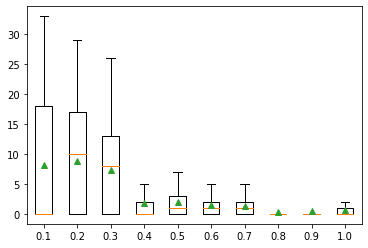

In [123]:
fig, ax = plt.subplots()
from copy import deepcopy
entries = []
for uptake in uptakes:
    dic = deepcopy(sts[uptake][overlap][.2][.05]['average-overall-death'])
    dic['label'] = uptake
    entries.append(dic)
f = ax.bxp(entries, showfliers=False, showmeans=True)

In [120]:
sts[1][overlap][0][taur]['average-max-infected']

{'mean': 9.888333333333334,
 'std': 37.20061388397325,
 'whislo': 1.0,
 'q1': 1.0,
 'med': 1.0,
 'q3': 1.0,
 'whishi': 1.0,
 'mean_wo': 162.12121212121212,
 'std_wo': 24.77367248683264}

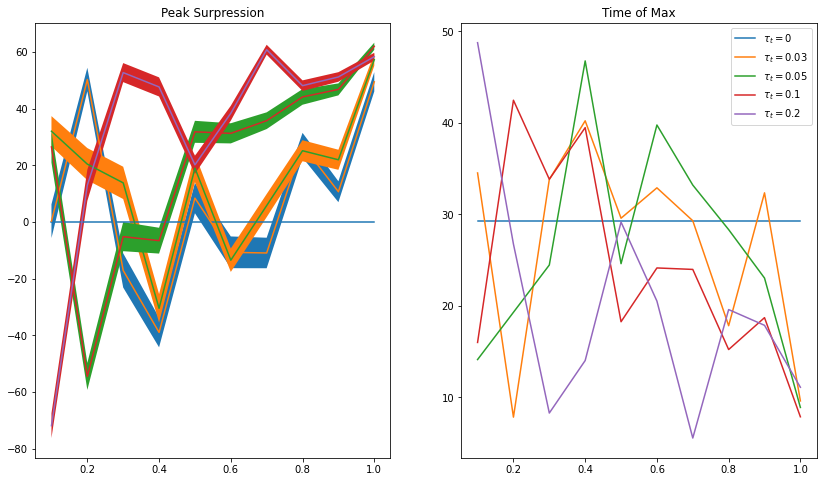

In [10]:
import numpy as np
import math
key_to_plot = 'mean'
err = 'std'
import matplotlib.pyplot as plt
sts = res[pa]
uptakes = sorted(sts.keys())
tauts = [.03, .05, .1, .2]
taur = .03
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur]['average-time-of-max-infected'][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur]['average-time-of-max-infected'][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

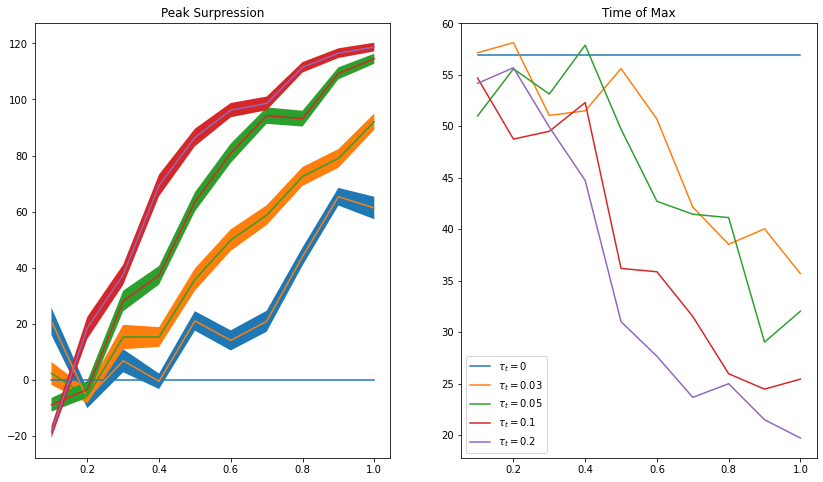

In [11]:
import numpy as np
import math
key_to_plot = 'mean_wo'
err = 'std_wo'
import matplotlib.pyplot as plt
sts = res[pa]
uptakes = sorted(sts.keys())
tauts = [.03, .05, .1, .2]
taur = .03
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur]['average-time-of-max-infected'][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur]['average-time-of-max-infected'][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

In [207]:
pa = .2
taur = .05
overlap = 1
sts = res[pa]
key_to_plot = 'mean'

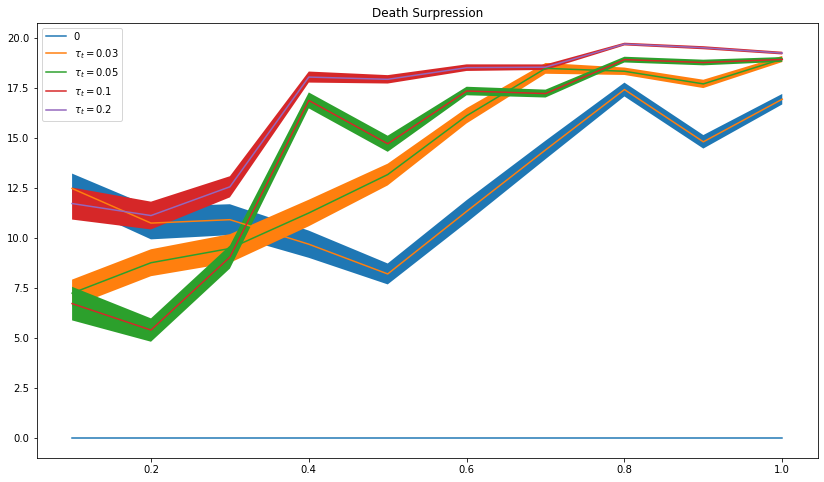

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import math
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-overall-death']['mean_wo']
# to_plot[to_plot < 1] = 1
ax.plot(uptakes, [0] * len(uptakes), label=0)

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error= []
    for uptake in uptakes:
        if taut == 0:
            continue
        item = sts[uptake][overlap][taut][taur]['average-overall-death']
#         try:
        to_plot.append(- item['mean'] + rate0)
        error.append(item['std'])
#         except:
#             pass
    to_plot = np.array(to_plot)
#     error = np.array(error)
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
    ax.plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax.fill_between(uptakes, to_plot-error, to_plot+error)
ax.set_title('Death Surpression')
plt.legend()

In [13]:
key = 'mean'

In [70]:
lst = [i[key] for i in sts[uptake][1][0][taur]['average-infected']]

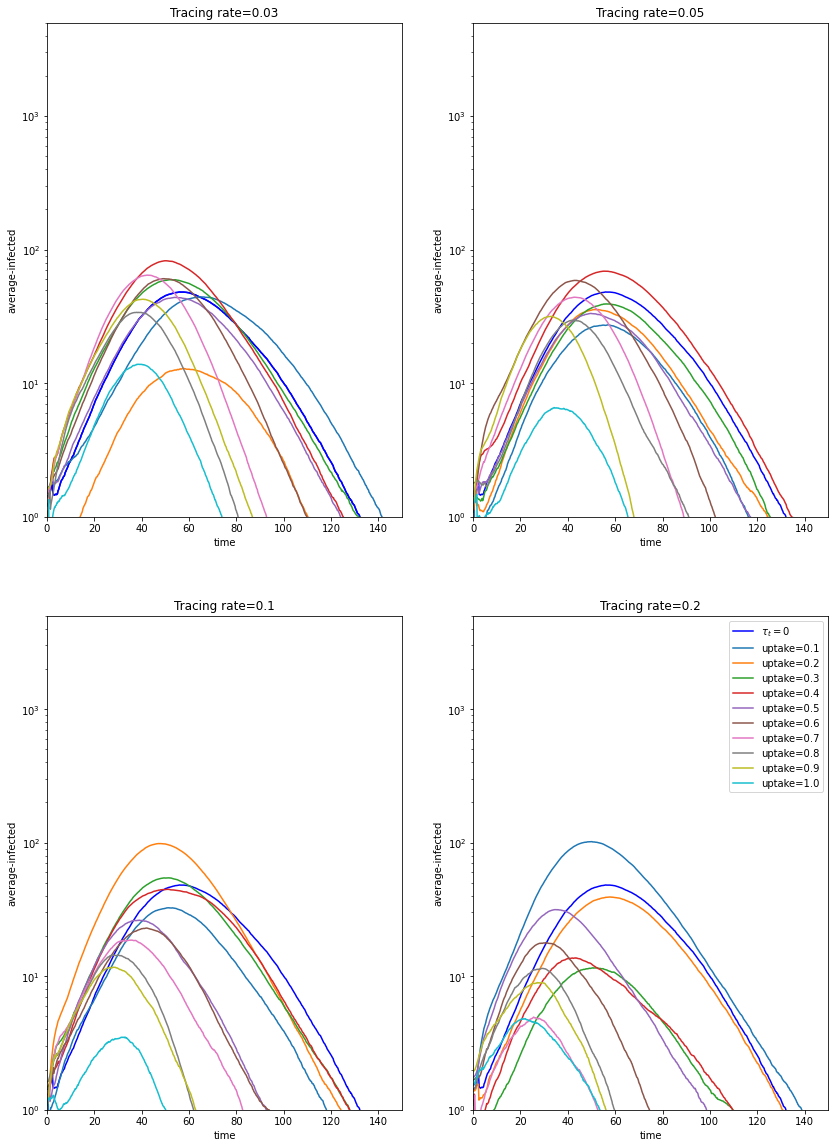

In [14]:
import matplotlib.pyplot as plt
pa = .2
sts = res[pa]
uptakes = sorted(sts.keys())
taur = .03
fig, ax = plt.subplots(2, 2, figsize=(14, 20))
ax[0][0].set_yscale('log')
ax[0][0].set_title('Tracing rate=' + str(0))
ax[0][0].set_xlim(0, 150)
ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
ax[0][0].set_ylabel('average-infected')
ax[0][0].set_ylim(1, 1000)


for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 5000)
    ax[i][j].set_xlabel('time')
    ax[i][j].set_ylabel('average-infected')
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
    ax[i][j].set_title('Tracing rate=' + str(taut))
    for uptake in uptakes:
        to_plot = [i[key] for i in sts[uptake][1][taut][taur]['average-infected']]
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
        
plt.legend()

In [161]:
sts[1][1][0][taur]['average-infected'][24]

{'mean': 0.235,
 'std': 1.0367737617508903,
 'whislo': 0.0,
 'q1': 0.0,
 'med': 0.0,
 'q3': 0.0,
 'whishi': 0.0,
 'mean_wo': 3.9696969696969697,
 'std_wo': 2.1284508522169427}

<h1> K = 20

In [272]:
pa = .2
taur = .2
overlap = 1
sts = res20[pa]
key_to_plot = 'mean'

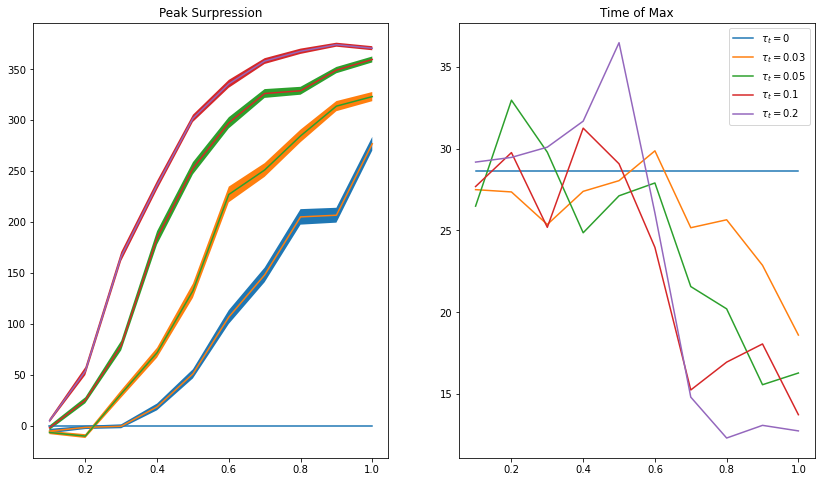

In [276]:
key_to_plot = 'mean_wo'
err = 'std_wo'
import matplotlib.pyplot as plt
uptakes = sorted(results.keys())
tauts = [.03, .05, .1, .2]
taur = .1
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur]['average-time-of-max-infected'][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur]['average-time-of-max-infected'][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

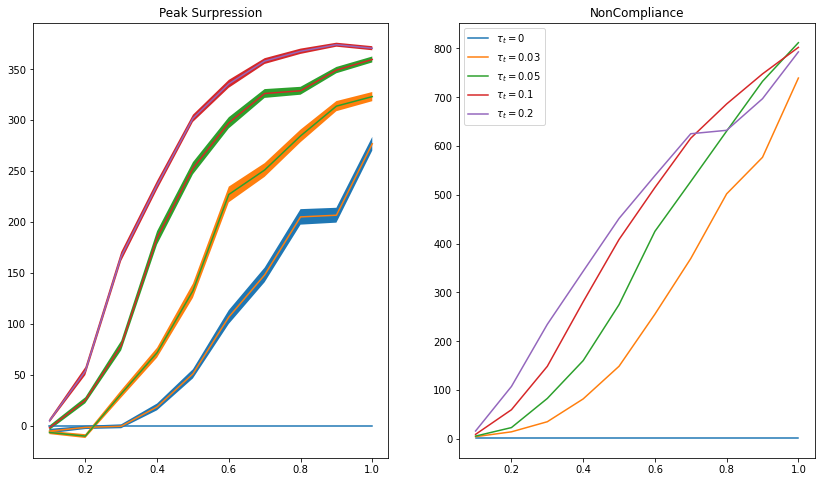

In [189]:
metric = 'average-overall-noncompliant'
key_to_plot = 'mean_wo'
err = 'std_wo'
import matplotlib.pyplot as plt
uptakes = sorted(results.keys())
tauts = [.03, .05, .1, .2]
taur = .1
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur][metric][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur][metric][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('NonCompliance')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

In [192]:
key

'mean'

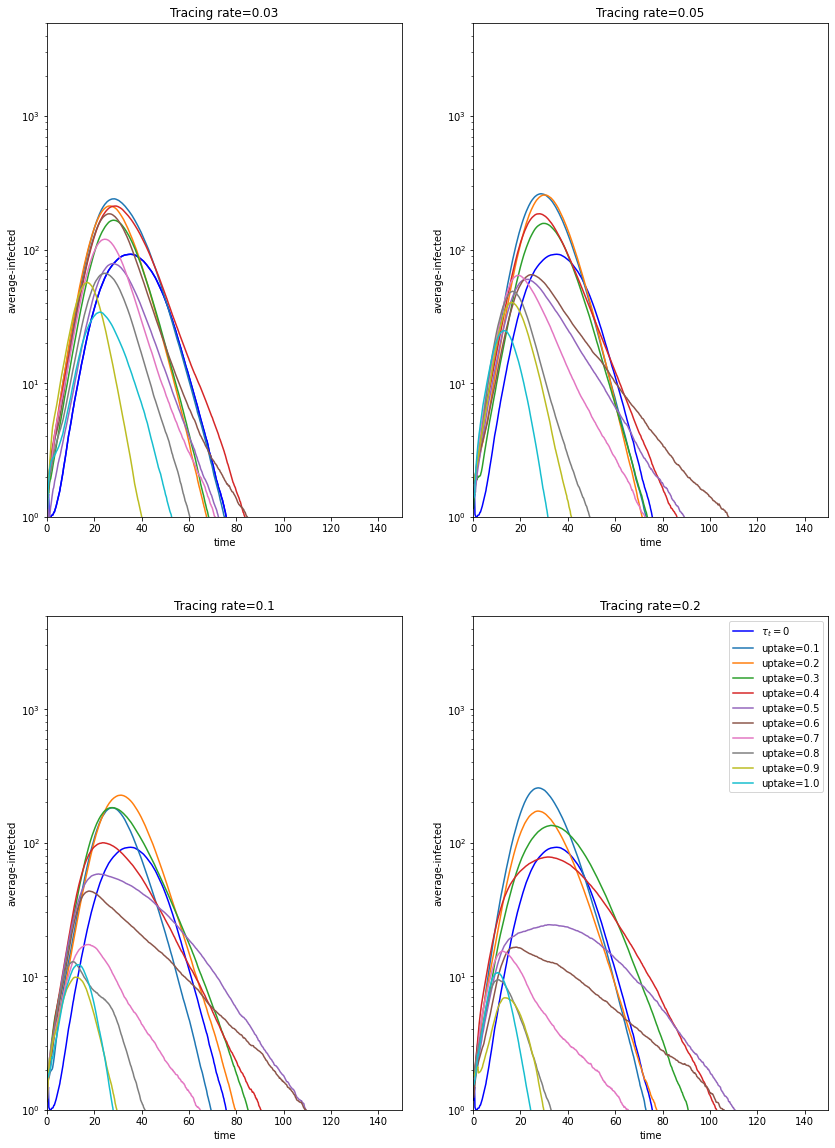

In [216]:
import matplotlib.pyplot as plt
pa = .2
sts = res20[pa]
uptakes = sorted(sts.keys())
taur = .2
fig, ax = plt.subplots(2, 2, figsize=(14, 20))
ax[0][0].set_yscale('log')
ax[0][0].set_title('Tracing rate=' + str(0))
ax[0][0].set_xlim(0, 150)
ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
ax[0][0].set_ylabel('average-infected')
ax[0][0].set_ylim(1, 1000)


for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 5000)
    ax[i][j].set_xlabel('time')
    ax[i][j].set_ylabel('average-infected')
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
    ax[i][j].set_title('Tracing rate=' + str(taut))
    for uptake in uptakes:
        to_plot = [i[key] for i in sts[uptake][1][taut][taur]['average-infected']]
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
        
plt.legend()

In [198]:
sts[1][1][0.1][taur]['average-max-infected'][key_to_plot]

17.32

In [199]:
sts[1][1][0][taur]['average-max-infected'][key_to_plot]

144.88166666666666

<h1> Analyze early stop

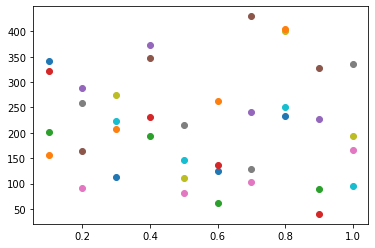

In [236]:
pa = .2
taur = .05
sts = res[pa]
for uptake in uptakes:
    for taut in tauts:
        plt.scatter(uptake, sts[uptake][1][taut][taur]['early-stopped'])

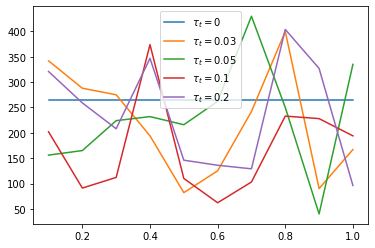

In [244]:
fig, ax = plt.subplots()
ax.plot(uptakes, [sts[1][overlap][0][taur]['early-stopped']] * len(uptakes), label=r'$\tau_t=0$')
for taut in sorted(tauts):
    to_plot = []
    for uptake in uptakes:
#         if taut == 0:
#             continue
#         try:
        item = sts[uptake][overlap][taut][taur]['early-stopped']
        to_plot.append(item)
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax.plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
plt.legend()